## **Question 1: Normalized Fragment Length Distribution from BED File**

In [2]:
import gzip
from collections import defaultdict
import matplotlib.pyplot as plt

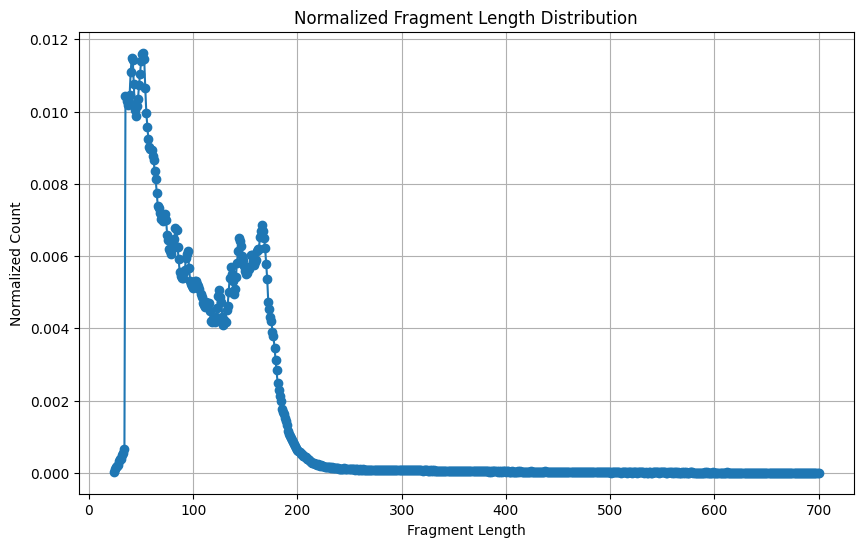

In [3]:
file_path= 'query.bed.gz'
fragment_count= defaultdict(int)
total_fragments= 0

with gzip.open(file_path, 'rt') as f:
  for line in f:
    if line.strip() == "":
      continue
    parts= line.strip().split('\t')
    if len(parts)<3:
      continue
    try:
      start= int(parts[1])
      end= int(parts[2])
      length= end - start
      if length > 0:
        fragment_count[length] += 1
        total_fragments += 1
    except ValueError:
      continue

fragment_lengths= sorted(fragment_count.keys())
normalized_counts= [fragment_count[l] / total_fragments for l in fragment_lengths ]

plt.figure(figsize=(10,6))
plt.plot(fragment_lengths, normalized_counts, marker='o', linestyle='-')
plt.xlabel('Fragment Length')
plt.ylabel('Normalized Count')
plt.title('Normalized Fragment Length Distribution')
plt.grid(True)
plt.show()